In [ ]:
# Exploratory Data Analysis for African E-commerce Transactions

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [2]:

# Connect to the SQLite database and load the data
conn = sqlite3.connect('../data/african_ecommerce.db')
df = pd.read_sql_query("SELECT * FROM transactions", conn)
conn.close()


In [3]:

# 1. Data Overview
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        100000 non-null  int64  
 1   transaction_date      100000 non-null  object 
 2   country               100000 non-null  object 
 3   transaction_amount    100000 non-null  float64
 4   verification_method   100000 non-null  object 
 5   verification_success  100000 non-null  int64  
 6   fraud_flag            100000 non-null  int64  
 7   user_age              100000 non-null  int64  
 8   user_gender           100000 non-null  object 
 9   device_type           100000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB
None
       transaction_id  transaction_amount  verification_success  \
count   100000.000000       100000.000000         100000.000000   
mean     50000.500000          505.721503              0.899820  

In [4]:

# 2. Check for missing values
print(df.isnull().sum())


transaction_id          0
transaction_date        0
country                 0
transaction_amount      0
verification_method     0
verification_success    0
fraud_flag              0
user_age                0
user_gender             0
device_type             0
dtype: int64


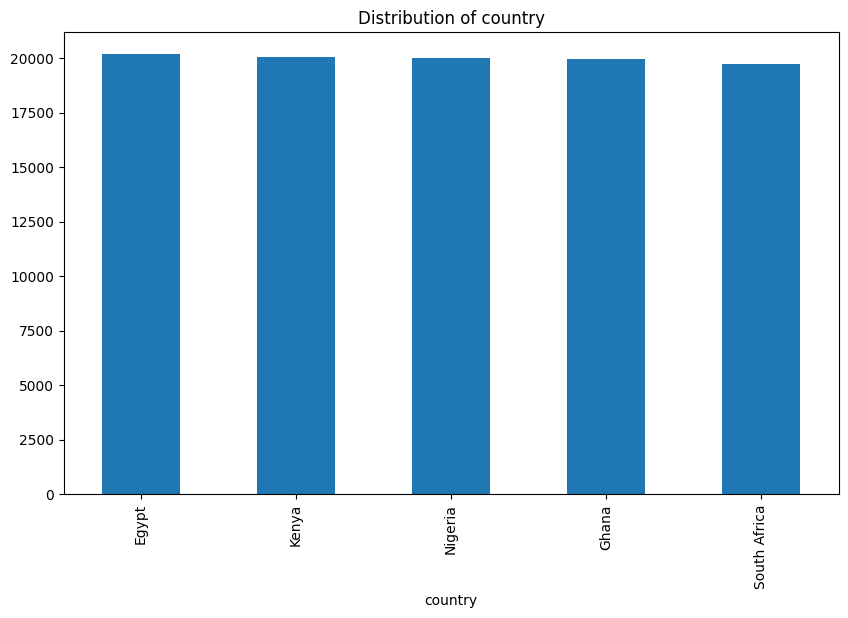

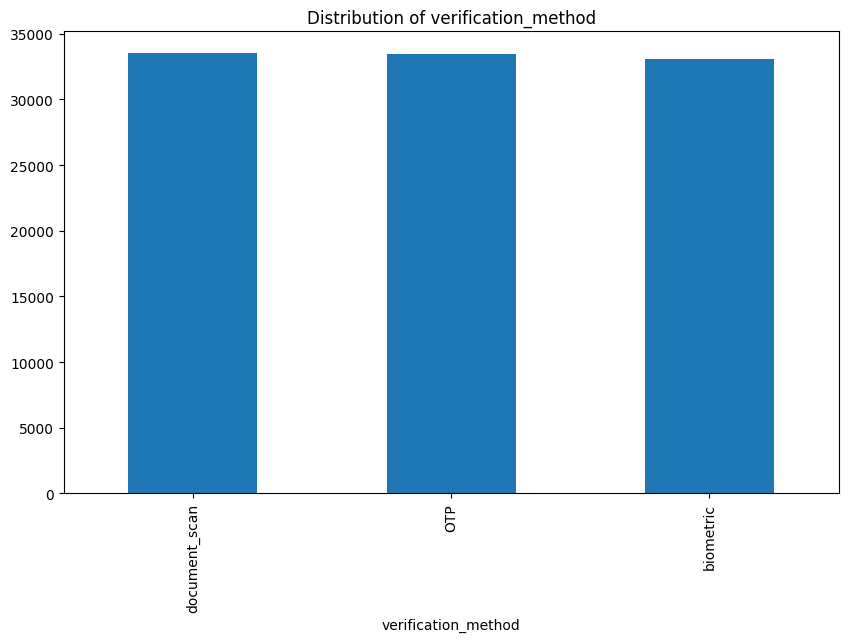

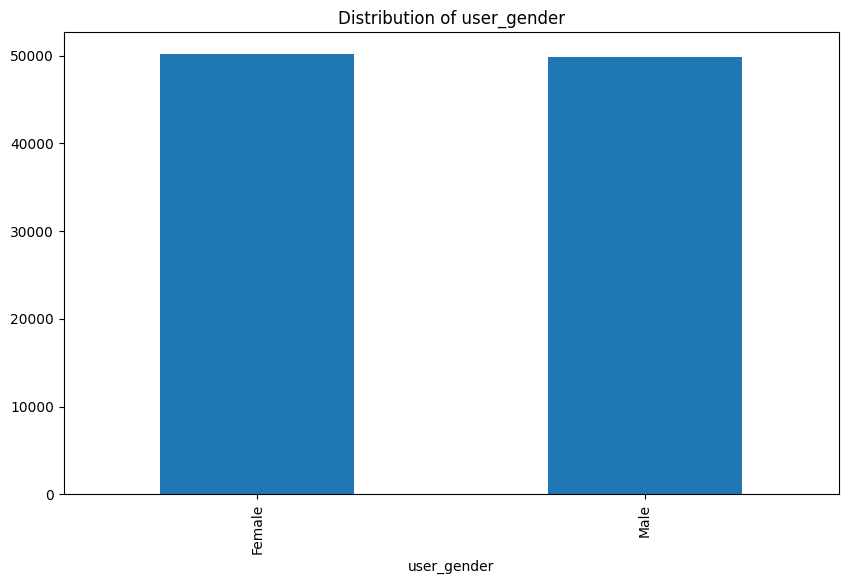

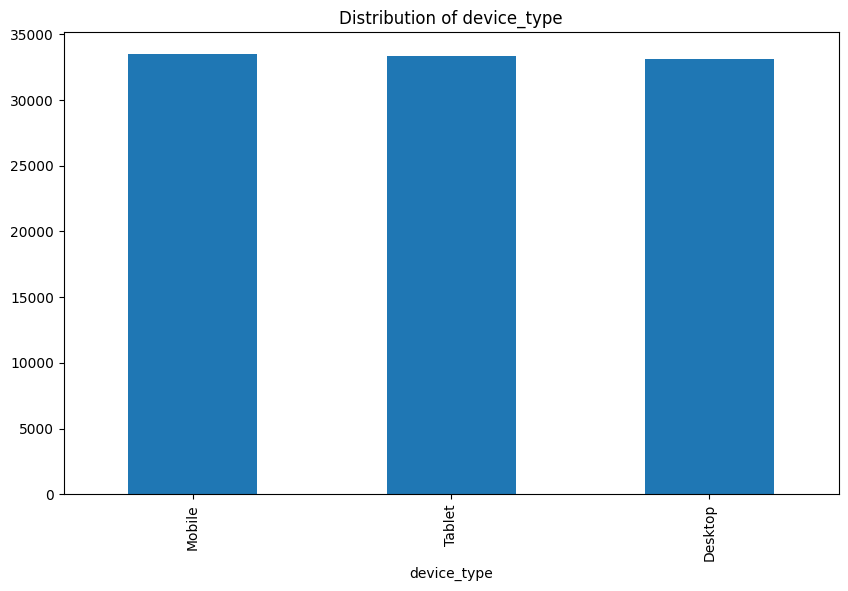

In [5]:

# 3. Distribution of categorical variables
for col in ['country', 'verification_method', 'user_gender', 'device_type']:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()


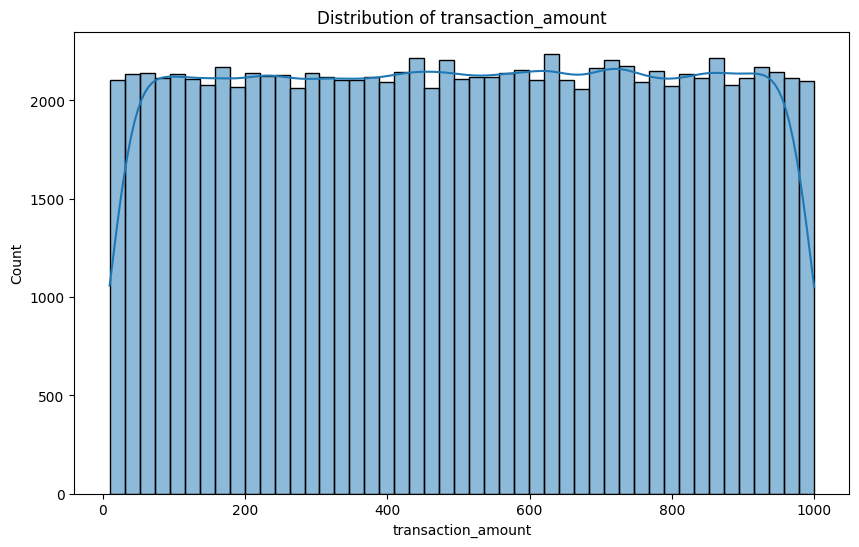

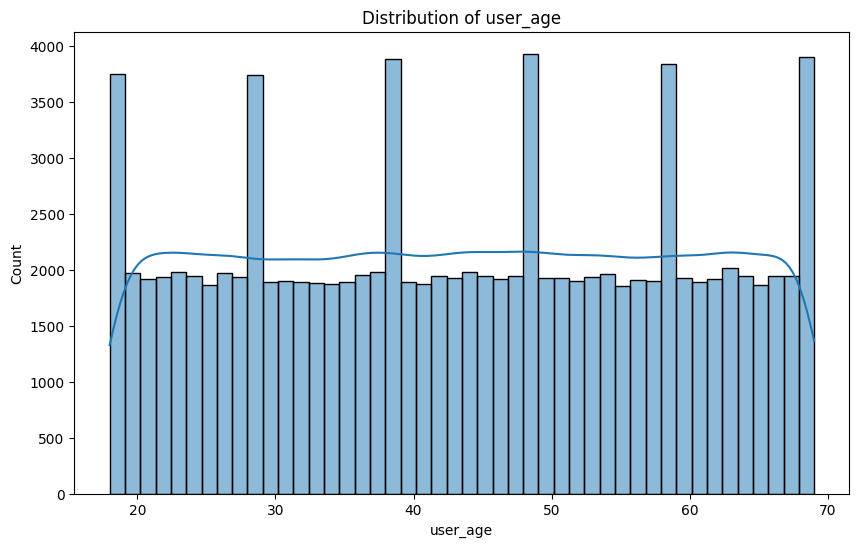

In [6]:

# 4. Distribution of numerical variables
for col in ['transaction_amount', 'user_age']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [7]:

# 5. Correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: '2023-08-26 20:09:14.142152000'

<Figure size 1000x800 with 0 Axes>

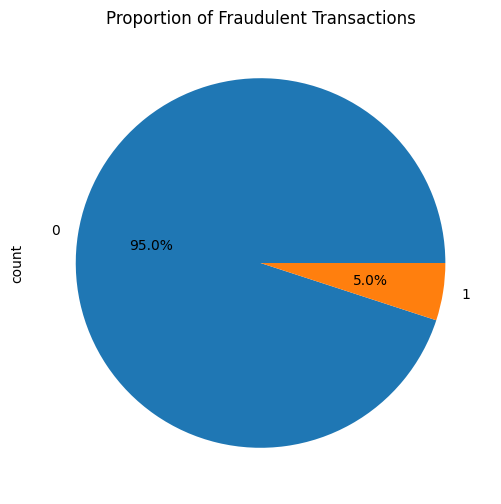

In [8]:

# 6. Fraud analysis
plt.figure(figsize=(10, 6))
df['fraud_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions')
plt.show()


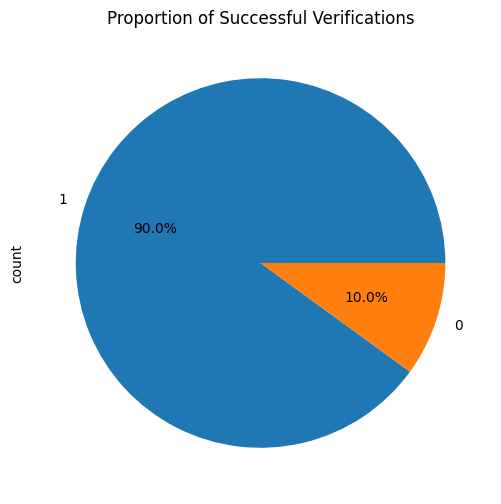

In [9]:

# 7. Verification success analysis
plt.figure(figsize=(10, 6))
df['verification_success'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Successful Verifications')
plt.show()


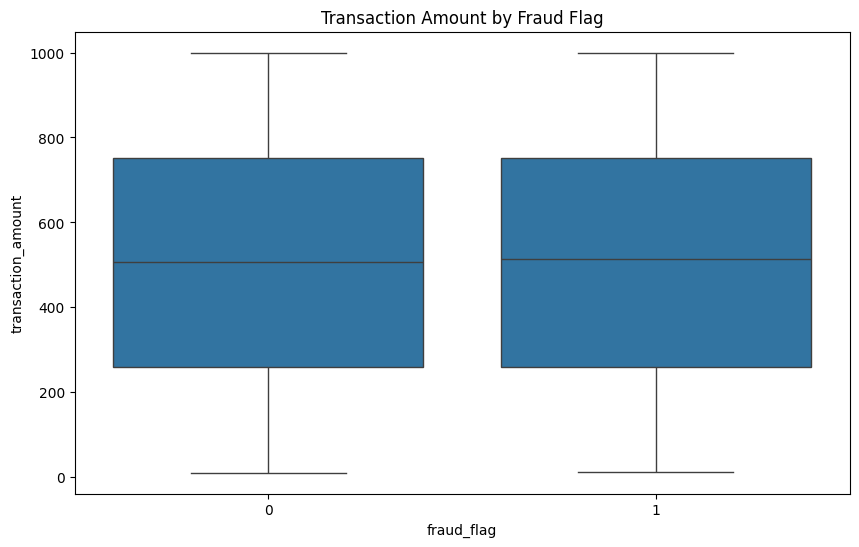

In [10]:

# 8. Transaction amount by fraud flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_flag', y='transaction_amount', data=df)
plt.title('Transaction Amount by Fraud Flag')
plt.show()


In [ ]:

# 9. Fraud rate by country
fraud_by_country = df.groupby('country')['fraud_flag'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
fraud_by_country.plot(kind='bar')
plt.title('Fraud Rate by Country')
plt.show()


In [ ]:

# 10. Time series analysis of transactions
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
daily_transactions = df.groupby(df['transaction_date'].dt.date).size()
plt.figure(figsize=(15, 6))
daily_transactions.plot()
plt.title('Daily Transaction Volume')
plt.show()
